In [1]:
import os.path
from pathlib import Path
import urllib.request
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math as mt
import numpy as np
from scipy import stats as st

In [2]:
#создадим папку
Path('datasets').mkdir(parents=True, exist_ok=True)

#словарь с именем файла и сылкой на него
urls = {
    'calls' : ('', 'calls.csv'),
    'messages': ('', 'internet.csv'),
    'internet': ('', 'messages.csv'),
    'tariffs': ('', 'tariffs.csv'),
    'users': ('', 'users.csv')
    
}

#проверим есть ли файл 
for dict1 in urls:
    if not os.path.exists(urls.get(dict1)[1]):
        print(urls.get(dict1)[1], 'файл не найден, будет загружен из интренета')
        #качаем файл по ссылке
        urllib.request.urlretrieve(*urls.get(dict1))
    else:
        print(urls.get(dict1)[1], 'файл найден')

#df = pd.read_csv(urls['flat'][1], sep='\t')

calls.csv файл найден
internet.csv файл найден
messages.csv файл найден
tariffs.csv файл найден
users.csv файл найден


In [3]:
calls = pd.read_csv('')
users = pd.read_csv('')
messages = pd.read_csv('')
internet =  pd.read_csv('')
tariffs = pd.read_csv('')

In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [6]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [7]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [9]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.head()




,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [10]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [11]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [14]:
calls['month'] =  pd.DatetimeIndex(calls['call_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
users['month'] = pd.DatetimeIndex(users['reg_date']).month
calls.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


Были полученны и просмотерны все таблицы для дальнейщего анализа





In [15]:
calls['duration'] = calls['duration'].apply(np.ceil)
internet['mb_used'] = internet['mb_used'].apply(np.ceil)



In [16]:
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499,12
202603,1499_216,2018-10-18,19.0,1499,10
202604,1499_217,2018-11-10,11.0,1499,11
202605,1499_218,2018-10-06,5.0,1499,10


In [17]:
messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [18]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113.0,2018-11-25,1000,11
1,1,1000_1,1053.0,2018-09-07,1000,9
2,2,1000_2,1198.0,2018-06-25,1000,6
3,3,1000_3,551.0,2018-08-22,1000,8
4,4,1000_4,303.0,2018-09-24,1000,9
...,...,...,...,...,...,...
149391,149391,1499_152,319.0,2018-10-03,1499,10
149392,149392,1499_153,491.0,2018-12-14,1499,12
149393,149393,1499_154,0.0,2018-10-27,1499,10
149394,149394,1499_155,1247.0,2018-11-26,1499,11


In [19]:
int_mean = internet.groupby('user_id')['mb_used'].median()
int_calls = calls.groupby('user_id')['duration'].median()

In [20]:
def zero1_remover_internet(row):
    
    mb_used = row['mb_used']
    user_id = row['user_id']
    
    if mb_used  == 0:
        
        return int_mean[user_id]
    return mb_used

def zero1_minus_calls(row):
    
    user_id = row['user_id']
    duration = row['duration']
    
    if duration == 0 :
        
        return int_calls[user_id]
    
    return duration
    
    

In [21]:
internet['mb_used'] = internet.apply(zero1_remover_internet, axis=1)
calls['duration'] = calls.apply(zero1_minus_calls, axis=1)

In [22]:
internet








,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113.0,2018-11-25,1000,11
1,1,1000_1,1053.0,2018-09-07,1000,9
2,2,1000_2,1198.0,2018-06-25,1000,6
3,3,1000_3,551.0,2018-08-22,1000,8
4,4,1000_4,303.0,2018-09-24,1000,9
...,...,...,...,...,...,...
149391,149391,1499_152,319.0,2018-10-03,1499,10
149392,149392,1499_153,491.0,2018-12-14,1499,12
149393,149393,1499_154,269.0,2018-10-27,1499,10
149394,149394,1499_155,1247.0,2018-11-26,1499,11


In [23]:
piv_internet = internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum' ) #Группируем таблицу для нахожения количесва мегабайт 
piv_internet

mb_used
user_id month         
1000    5       2783.0
        6      25892.0
        7      14543.0
        8      15124.0
        9      15635.0
...                ...
1498    10     23544.0
1499    9       2117.0
        10     21844.0
        11     20674.0
        12     14422.0

[3203 rows x 1 columns]

In [24]:
piv_calls = calls.pivot_table(index=['user_id','month'], values='duration', aggfunc='sum')#Группируем таблицу для нахожения суммы минут 
piv_calls 

duration
user_id month          
1000    5         189.0
        6         262.0
        7         376.0
        8         468.0
        9         538.0
...                 ...
1498    10        324.0
1499    9          77.0
        10        617.0
        11        696.0
        12        583.0

[3174 rows x 1 columns]

In [25]:
piv_mes = messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count')#Группируем таблицу для нахожения количесва сообщений  
piv_mes 

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
...            ..
1498    10     42
1499    9      11
        10     48
        11     59
        12     66

[2717 rows x 1 columns]

In [26]:
df = piv_calls.merge(piv_mes,  on=['user_id', 'month'], how='outer')
df = df.merge(piv_internet,  on=['user_id', 'month'], how='outer' )
 # Соеденяем таблицы между собой по 'user_id' и 'month' для полчучения общей таблицы




In [27]:
def nan_remover_duration(row):
   
    duration = row['duration']
    
    if duration != duration:
        
        return 0
    
    return duration

def nan_remover_id(row):
    
    id = row['id']
    
    if id != id:
        
        return 0
    
    return id
    

In [28]:
df['duration'] = df.apply(nan_remover_duration, axis=1)
df['id'] = df.apply(nan_remover_id, axis=1)

In [29]:
df['duration'] = df['duration'].astype('int64')
df['id'] = df['id'].astype('int64')

In [30]:
df




duration  id  mb_used
user_id month                       
1000    5           189  22   2783.0
        6           262  60  25892.0
        7           376  75  14543.0
        8           468  81  15124.0
        9           538  57  15635.0
...                 ...  ..      ...
1489    9             0  32  21208.0
        10            0  21  22712.0
        11            0  20  20356.0
        12            0  35  19613.0
1476    4             0   0    531.0

[3214 rows x 3 columns]

In [31]:
filt = users.query('tariff == "ultra"')['user_id'].tolist() # Фильтр для нахожение пользователей с тарифом ульра
filt2 = users.query('city == "Москва"')['user_id'].tolist() # Фильтр для нахожение пользователей с городом Москва

In [32]:
def ff(row):
    
    if row.name[0]  in filt:
        return "ultra"
    return 'smart'


def city(row):
    
    if row.name[0]  in filt2:
        return "Москва"
    return "Другой"


df['tarrif'] = df.apply(ff, axis=1)
df['city'] = df.apply(city, axis=1)
df

duration  id  mb_used tarrif    city
user_id month                                      
1000    5           189  22   2783.0  ultra  Другой
        6           262  60  25892.0  ultra  Другой
        7           376  75  14543.0  ultra  Другой
        8           468  81  15124.0  ultra  Другой
        9           538  57  15635.0  ultra  Другой
...                 ...  ..      ...    ...     ...
1489    9             0  32  21208.0  smart  Другой
        10            0  21  22712.0  smart  Другой
        11            0  20  20356.0  smart  Другой
        12            0  35  19613.0  smart  Другой
1476    4             0   0    531.0  ultra  Москва

[3214 rows x 5 columns]

In [33]:
def mb_to_gb(row):
    
    mb_used = row['gb_used']
    
    return mt.ceil(mb_used / 1000)  # Переводиним мегабайты в гигабайты и окуруглям вверх

In [34]:
df.rename(columns={'mb_used': 'gb_used'}, inplace=True) # Переименовываем столбец с мегабайтами в столбец с гигабайтами
df['gb_used'] = df['gb_used'].fillna(0)

In [35]:
df['gb_used'] = df.apply(mb_to_gb, axis=1)
df

duration  id  gb_used tarrif    city
user_id month                                      
1000    5           189  22        3  ultra  Другой
        6           262  60       26  ultra  Другой
        7           376  75       15  ultra  Другой
        8           468  81       16  ultra  Другой
        9           538  57       16  ultra  Другой
...                 ...  ..      ...    ...     ...
1489    9             0  32       22  smart  Другой
        10            0  21       23  smart  Другой
        11            0  20       21  smart  Другой
        12            0  35       20  smart  Другой
1476    4             0   0        1  ultra  Москва

[3214 rows x 5 columns]

In [36]:
def profit(row):
    
    mb_used = row['gb_used']
    duration = row['duration']
    id = row['id']
    tarrif = row['tarrif']
    
    
    if tarrif == 'ultra':
       
        prof = 1950
        cal = 3000 - duration  
        mes = 1000 - id
        inter = 30 - mb_used
        list = [cal,mes,inter]
        
        for i in list:
            if i < 0:
                if i == cal: 
                    prof += (i * -1) * 1  
                if i == mes:
                    prof += (i * -1) * 1
                if i == inter:
                    prof += (i * -1) * 150
                    
        return prof
    
    if tarrif == 'smart':
        
        prof = 550
        cal = 500 - duration  
        mes = 50 - id
        inter = 15 - mb_used
        list = [cal,mes,inter]
        
        for i in list:
            if i < 0:
                if i == cal: 
                    prof += (i * -1) * 3  
                if i == mes:
                    prof += (i * -1) * 3
                if i == inter:
                    prof += (i * -1) * 200
        
        return prof       
    

In [37]:
df['profit'] = df.apply(profit, axis=1)

In [38]:
df

duration  id  gb_used tarrif    city  profit
user_id month                                              
1000    5           189  22        3  ultra  Другой    1950
        6           262  60       26  ultra  Другой    1950
        7           376  75       15  ultra  Другой    1950
        8           468  81       16  ultra  Другой    1950
        9           538  57       16  ultra  Другой    1950
...                 ...  ..      ...    ...     ...     ...
1489    9             0  32       22  smart  Другой    1950
        10            0  21       23  smart  Другой    2150
        11            0  20       21  smart  Другой    1750
        12            0  35       20  smart  Другой    1550
1476    4             0   0        1  ultra  Москва    1950

[3214 rows x 6 columns]

В результате было:
<li>Найдена сумма минут для каждого пользователя по месяцам </li>
<li>Найдено количество израсходованного интренет трафика</li>
<li>Найдена количество сообещений </li>
<li>В каждую таблицу был доблен месяц</li>
<li>Объеденение таблиц в одну общую для дальнейщего анализа данных</li>
<li>Добавлен столбец с тарифом</li>
<li>Написанна функция для нахожения прибыли кадого пользователя по месяцам</li>
<li>Посчитанна прибыль каждого пользователя по месяцам</li>







In [39]:
smart = df.query('tarrif == "smart"') # Таблица пользователей с тарифом смарт
ultra = df.query('tarrif == "ultra"') # Таблица пользователей с тарифом ультра

In [40]:
#information_smart = pd.DataFrame(columns=['minuts', 'internet', 'mess'])


d = {'values': ['mean','median','dispersion', 'std']}
information_smart = pd.DataFrame(d).set_index('values')
information_ultra = pd.DataFrame(d).set_index('values')


In [41]:
dict2 = {
        'duration': 'минут',
        'gb_used': 'интрнета',
        'id': 'сообщений',
}


dict = {
        "smart": smart, 
        "ultra" : ultra
       }


for word in dict2:
    
        mean = smart[word].mean()
        information_smart.loc['mean', word] = '{:.2f}'.format(mean)
        median = smart[word].median()
        information_smart.loc['median', word] = median
        dipres = np.var(smart[word], ddof=1) 
        information_smart.loc['dispersion', word] = '{:.2f}'.format(dipres)
        stand = np.sqrt(dipres)
        information_smart.loc['std', word] = '{:.2f}'.format(stand)
        

In [42]:
for word in dict2:
    
        mean = ultra[word].mean()
        information_ultra.loc['mean', word] = '{:.2f}'.format(mean)
        median = ultra[word].median()
        information_ultra.loc['median', word] = median
        dipres = np.var(ultra[word], ddof=1) 
        information_ultra.loc['dispersion', word] = '{:.2f}'.format(dipres)
        stand = np.sqrt(dipres)
        information_ultra.loc['std', word] = '{:.2f}'.format(stand)
        
        

In [43]:
information_smart

,duration,gb_used,id
values,,,
mean,492.37,19.11,33.38
median,500,20,28
dispersion,48936.60,43.70,796.81
std,221.22,6.61,28.23


In [44]:
information_ultra

,duration,gb_used,id
values,,,
mean,618.41,20.88,49.36
median,610,21,38
dispersion,138394.37,110.69,2285.27
std,372.01,10.52,47.80


Среднее количество минут для тарифа smart: 361.89<br>
Медиана минут для тарифа smart: 385<br>
Дисперсия минут для тарифа smart: 51698.54<br>
Стандартное отклонение минут для тарифа smart: 227.37<br>

Среднее количество интрнета для тарифа smart: 16<br>
Медиана интрнета для тарифа smart: 17<br>
Дисперсия интрнета для тарифа smart: 34.54<br>
Стандартное отклонение интрнета для тарифа smart: 5.88<br>

Среднее количество сообщений для тарифа smart: 33<br>
Медиана сообщений для тарифа smart: 28<br>
Дисперсия сообщений для тарифа smart: 799.33<br>
Стандартное отклонение сообщений для тарифа smart: 28.27<br>

Среднее количество минут для тарифа ultra: 429.49<br>
Медиана минут для тарифа ultra: 418<br>
Дисперсия минут для тарифа ultra: 129748.83<br>
Стандартное отклонение минут для тарифа ultra: 360.21<br>

Среднее количество интрнета для тарифа ultra: 20<br>
Медиана интрнета для тарифа ultra: 20<br>
Дисперсия интрнета для тарифа ultra: 99.24<br>
Стандартное отклонение интрнета для тарифа ultra: 9.96<br>

Среднее количество сообщений для тарифа ultra: 47.54<br>
Медиана сообщений для тарифа ultra: 37<br>
Дисперсия сообщений для тарифа ultra: 2219.64<br>
Стандартное отклонение сообщений для тарифа ultra: 47.11<br>





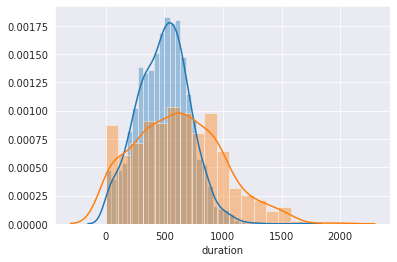

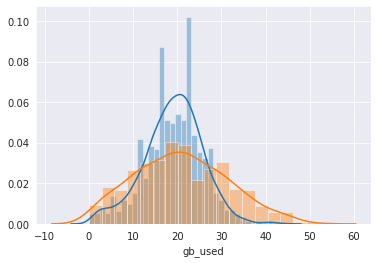

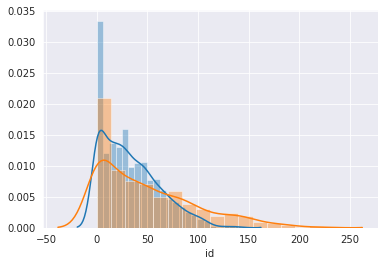

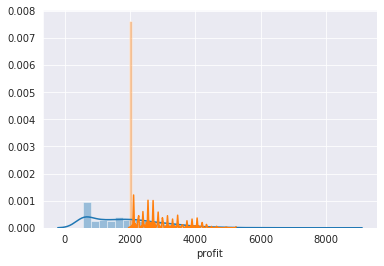

In [45]:
l = ['duration','gb_used','id','profit']


for hist1 in l :
    
        Q1 = smart[hist1].describe()['25%'] 
        Q3 = smart[hist1].describe()['75%']
        q1 = Q1 - 3 * (Q3 - Q1)
        q3 = Q3 + 3 * (Q3 - Q1)
        
        
        sns.xlim=(q1, q3)
        sns.set_style("darkgrid", {'axes.grid' : True})
        #smart.plot(kind='hist', y=hist1, xlim=(q1, q3), grid=True, figsize=(7,5), title=dict2[hist1])
        sns.distplot(smart[hist1])
        sns.distplot(ultra[hist1])
        plt.show()



Из графиков видно, что:<br>

<li>Большая часть пользователей тарифа смарт для минут  распологается на промежутке от 300 до 600</li>
<li>Большая часть пользователей тарифа ульра для минут  распологается на промежутке от 270 до 900</li><br>

<li>Большая часть пользователей  тарифа смарт для интернета распологаются на промежутке от 10 до 20</li>
<li>Большая часть пользователей тарифа ультра для интернета распологаются на промежутке от 5 до 35</li><br>

<li>Большая часть пользователей тарифа смарт ультра  для сообщений  распологаются  примерно на одном промежутке от 0 до 60, но пользователи тарифа смарт чаще исполбзуют сообщения</li>










Формируем нулевую гипотезу: Среденяя выручка пользователей тарифов «Ультра» и «Смарт» равны<br>
Альтернативная гипотиза: Среденяя выручка пользователей тарифов «Ультра» и «Смарт» не равны 

In [46]:
alpha = .05

results = st.stats.ttest_ind(smart['profit'], ultra['profit'])
 
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 9.707281439707882e-12
Отвергаем нулевую гипотезу


Формируем нулевую гипотезу: Средеднее количество минут  пользователей тарифов «Ультра» и «Смарт»  равны
<br>
Альтернативная гипотиза: Среденяя количество минут тарифов «Ультра» и «Смарт» не равны 

In [47]:
alpha = .07

results = st.stats.ttest_ind(smart['duration'], ultra['duration'])
 
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.2448347651031026e-32
Отвергаем нулевую гипотезу


Формируем нулевую гипотезу: Средеднее количество гигабайт пользователей тарифов «Ультра» и «Смарт» равны<br>
Альтернативная гипотиза: Среденяя количество гигабайт тарифов «Ультра» и «Смарт» не равны 

In [48]:
alpha = .07

results = st.stats.ttest_ind(smart['gb_used'], ultra['gb_used'])
 
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 8.626121018476643e-09
Отвергаем нулевую гипотезу


Формируем нулевую гипотезу: Средеднее количество сообшений  пользователей тарифов «Ультра» и «Смарт» равны<br>
Альтернативная гипотиза: Среденяя количество гигабайт тарифов «Ультра» и «Смарт» не равны 

In [49]:
alpha = .07

results = st.stats.ttest_ind(smart['id'], ultra['id'])
 
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.7346624732133354e-31
Отвергаем нулевую гипотезу


Из графиков минут разных тарифов можно увидеть что:<br>
Из графиков звонков разных тарифов можно увидеть что:
<li>Оба графика имеют пик в центре</li>
<li>Самая большая плотность распологаеться на промежутке ои 250 до 600 минут</li>
<li>У тарифа ультра меньше людей, которые не разговаривают по телефону, и больше людей чьи минуты привышают 700</li><br>
Из графиков инрернета  разных тарифов можно увидеть что:
<li>Оба графика имеют пик в центре, но пик расположен на разных значениях</li>
<li>Большая часть тарифа смарт используют от 13 до 21 гб</li>
<li>Большая часть тарифа ультра используют от 10 до 30 гб</li>
<li>У трафа Ультра больше людей, использующие более 25 гб </li><br>
Из графиков количества сообешений разных тарифов можно увидеть что:
<li>Оба графика скошенны вправо</li>
<li>Большая часть тарифа смарт находится от 10 до 45</li>
<li>Большая часть тарифа ультра находится от 13 до 80</li>


In [50]:
city_Moscow = df.query('city == "Москва"')# получаем таблицу с москвичами
city_Moscow

duration  id  gb_used tarrif    city  profit
user_id month                                              
1001    11          514   0       22  smart  Москва    1992
        12          510   0       17  smart  Москва     980
1003    8           452  37       10  ultra  Москва    1950
        9          1135  91       13  ultra  Москва    1950
        10          921  83       15  ultra  Москва    1950
...                 ...  ..      ...    ...     ...     ...
1490    9           413  48       18  smart  Москва    1150
        10          368  45       25  smart  Москва    2550
        11          331  47       21  smart  Москва    1750
        12          339  46       17  smart  Москва     950
1476    4             0   0        1  ultra  Москва    1950

[611 rows x 6 columns]

In [51]:
outher_city = df.query('city == "Другой"')# получаем таблицу не москвичами
outher_city

duration  id  gb_used tarrif    city  profit
user_id month                                              
1000    5           189  22        3  ultra  Другой    1950
        6           262  60       26  ultra  Другой    1950
        7           376  75       15  ultra  Другой    1950
        8           468  81       16  ultra  Другой    1950
        9           538  57       16  ultra  Другой    1950
...                 ...  ..      ...    ...     ...     ...
1489    8             0  17       13  smart  Другой     550
        9             0  32       22  smart  Другой    1950
        10            0  21       23  smart  Другой    2150
        11            0  20       21  smart  Другой    1750
        12            0  35       20  smart  Другой    1550

[2603 rows x 6 columns]

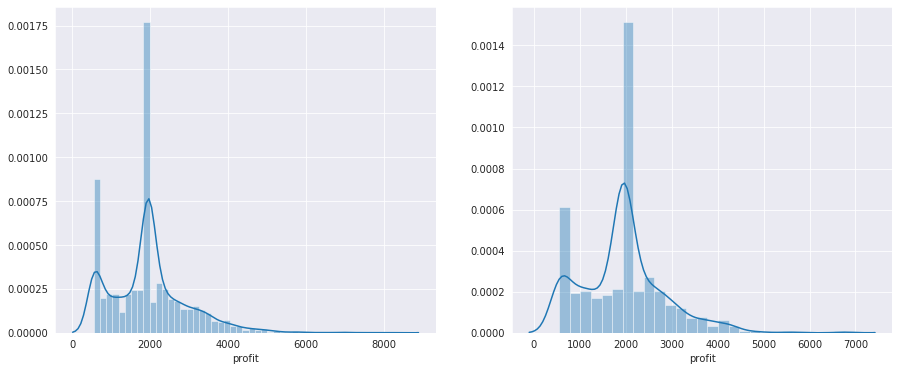

In [52]:
plt.subplot(1, 2, 1)
sns.distplot(outher_city['profit'])
plt.subplot(1, 2, 2)
sns.distplot(city_Moscow['profit'])
plt.gcf().set_size_inches(15, 6)

Формируем нулевую гипотезу: средняя выручка пользователей из Москвы равна  выручке пользователей из других регионов<br>
Альтренативная гипотиза : выручки не равны

In [53]:
print(np.var(outher_city['profit'], ddof=1) )
print(np.var(city_Moscow['profit'], ddof=1) )

1014281.0337034987
819276.5202275227


In [54]:
alpha = .07

results = st.stats.ttest_ind(outher_city['profit'], city_Moscow['profit'], equal_var=True)
 
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 



p-значение: 0.6185769920482456
Не получилось отвергнуть нулевую гипотезу


Как видно из  p-значения выручка почти в 38% случаев похожа, скорее всего связанно это с тем, что цены на тарифы в Москве и регионах одинаковые, из графиков видно, что они оба имеют пики в значених 550 и 1950, а это значить, что большое количество пользователей не выходят за приделы тарифа по минутам, собщениям и гигабайтам.Но так же мы можем увидеть, что люди живушие в москве чаше выбирают тариф ультра в отличие от регионов

In [55]:
outher_city['profit'].mean()

1958.7637341529005

In [56]:
city_Moscow['profit'].mean()




1936.6366612111292

<h1>Вывод</h1>

В результате работы было:

1) Посчитано для каждого пользователя:

<li>количество сделанных звонков и израсходованных минут разговора по месяцам</li>
<li>количество отправленных сообщений по месяцам</li>
<li>объем израсходованного интернет-трафика по месяцам</li>
<li>помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)</li>

    
2) Описано поведение клиентов оператора, исходя из выборки тарифов:<br>
<br>А) Для тарифа смарт: 
    <li>Среднее количество минут: 361</li>
    <li>Дисперсия минут: 51698</li>
    <li>Стандартное отклонение минут: 227</li><br>
    <li>Среднее количество интрнета: 16</li>
    <li>Дисперсия интрнета: 34</li>
    <li>Стандартное отклонение интрнета: 5 </li><br>
    <li>Среднее количество сообщений: 33</li>
    <li>Дисперсия сообщений для: 799</li>
    <li>Стандартное отклонение сообщений: 28</li><br>
<br> Б) Для тарифа ультра:

   <li>Среднее количество минут: 429</li>
   <li>Дисперсия минут для тарифа ultra: 129748</li>
   <li>Стандартное отклонение минут для тарифа ultra: 360</li><br>
   <li>Cреднее количество интрнета для тарифа ultra: 20</li>
   <li>Дисперсия интрнета для тарифа ultra: 99</li>
   <li>Стандартное отклонение интрнета для тарифа ultra: 10</li><br>
   <li>Среднее количество сообщений для тарифа ultra: 47</li>
   <li>Дисперсия сообщений для тарифа ultra: 2219</li>
   <li>Стандартное отклонение сообщений для тарифа ultra: 47</li><br>
   
3) Проверенны гипотезы <br>
   <li>Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается</li><br>
Были постренны графикифики Из графиков минут разных тарифов можно увидеть что:<br>
Из графиков звонков разных тарифов можно увидеть что:
<li>Оба графика имеют пик в центре</li>
<li>Самая большая плотность распологаеться на промежутке ои 250 до 550 минут</li>
<li>У тарифа ультра меньше людей, которые не разговаривают по телефону, и больше людей чьи минуты привышают 700</li><br>
Из графиков инрернета  разных тарифов можно увидеть что:
<li>Оба графика имеют пик в центре, но пик расположен на разных значениях</li>
<li>Большая часть тарифа смарт используют от 13 до 21 гб</li>
<li>Большая часть тарифа ультра используют от 10 до 30 гб</li>
<li>У трафа Ультра больше людей, использующие более 25 гб </li><br>
Из графиков количества сообешений разных тарифов можно увидеть что:
<li>Оба графика скошенны вправо</li>
<li>Большая часть тарифа смарт находится от 10 до 45</li>
<li>Большая часть тарифа ультра находится от 13 до 80</li>

   
   <li>Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</li>
   
Как видно из p-значения выручка почти в 83% случаев похожа, скорее всего связанно это с тем, что цены на тарифы в Москве и регионах одинаковые, из графиков видно, что они оба имеют пики в значених 550 и 1950, а это значить, что большое количество пользователей не выходят за приделы тарифа по минутам, собщениям и гигабайтам.Но так же мы можем увидеть, что люди живушие в москве чаше выбирают тариф ультра в отличие от регионов
   
   
Для увелечения прибыли, кампания может повысить стоимоть тарифа смарт в Москве на 50р, в регионах на 30










